Дана карта с целями, координаты целей записаны в файле в целочисленном формате
Задача: навести ракету с радиусом поражения r так, чтобы количество поражённых объектов было максимально

In [162]:
r = int(input('Введите радиус поражения ракеты:'))

Введите радиус поражения ракеты: 5


r = 5

In [163]:
cords={}
with open("coords.txt", "r") as file:
        content=file.read()
        j = 0
        for i in content.split('\n'):
            j += 1
            c = tuple(map(int, i.split(',')))
            cords[j] = c

In [164]:
if len(cords) == 0:
    print("Целей не обнаружено")
elif len(cords) == 1:
    target = cords[1]
    maxim = 1
elif len(cords) == 2:
    if (cords[1][0] - cords[2][0])**2 + (cords[1][1] - cords[2][1])**2 > r**2:
        target = cords[1]     
        maxim = 1

In [165]:
for i in range(1, 10):
    print(cords[i])

(1, 1)
(50, 50)
(51, 51)
(52, 52)
(53, 53)
(50, 53)
(97, 16)
(14, 53)
(78, 68)


Посчитаем расстояния между точками

In [166]:
def dist(a, b):
    d = [a[0] - b[0], a[1] - b[1]]
    return (d[0] * d[0] + d[1] * d[1]) 

D = {}

for city1, cords1 in cords.items():
    D[city1] = {}
    for city2, cords2 in cords.items():
        if city2 != city1: D[city1][city2] = dist(cords1, cords2)   

dist = []        
for city1, v in D.items():
    for city2, d in v.items():
        dist.append((city1, city2, d))

In [167]:
dist[1:10]

[(1, 3, 5000),
 (1, 4, 5202),
 (1, 5, 5408),
 (1, 6, 5105),
 (1, 7, 9441),
 (1, 8, 2873),
 (1, 9, 10418),
 (1, 10, 6705),
 (1, 11, 4329)]

In [168]:
min_dist = sorted(dist, key=lambda attr: attr[2]) 

In [169]:
min_dist2 = list(filter(lambda x: (0 < x[2] <= r**2), min_dist))

Найдем пары точек с расстоянием меньше, чем r в квадрате ( так как мы не извлекали корень в формуле расстояния)

In [170]:
print(min_dist2[::], end='')

[(1, 12, 1), (2, 62, 1), (3, 62, 1), (12, 1, 1), (57, 62, 1), (62, 2, 1), (62, 3, 1), (62, 57, 1), (2, 3, 2), (3, 2, 2), (3, 4, 2), (3, 57, 2), (4, 3, 2), (4, 5, 2), (5, 4, 2), (19, 58, 2), (33, 115, 2), (57, 3, 2), (58, 19, 2), (58, 75, 2), (75, 58, 2), (89, 115, 2), (112, 113, 2), (113, 112, 2), (115, 33, 2), (115, 89, 2), (61, 62, 4), (62, 61, 4), (3, 6, 5), (3, 61, 5), (4, 6, 5), (4, 61, 5), (4, 62, 5), (6, 3, 5), (6, 4, 5), (6, 35, 5), (6, 91, 5), (12, 112, 5), (13, 14, 5), (13, 70, 5), (14, 13, 5), (14, 69, 5), (35, 6, 5), (61, 3, 5), (61, 4, 5), (62, 4, 5), (69, 14, 5), (69, 70, 5), (70, 13, 5), (70, 69, 5), (91, 6, 5), (112, 12, 5), (2, 4, 8), (2, 35, 8), (2, 91, 8), (3, 5, 8), (4, 2, 8), (4, 57, 8), (5, 3, 8), (26, 114, 8), (35, 2, 8), (35, 57, 8), (57, 4, 8), (57, 35, 8), (57, 91, 8), (82, 114, 8), (91, 2, 8), (91, 57, 8), (114, 26, 8), (114, 82, 8), (2, 6, 9), (2, 61, 9), (5, 6, 9), (5, 61, 9), (6, 2, 9), (6, 5, 9), (6, 57, 9), (57, 6, 9), (57, 61, 9), (61, 2, 9), (61, 5, 9)

In [171]:
for i, j, k in min_dist2:
    print(i, '<->', j, ' dist = ', k, end='\n')

1 <-> 12  dist =  1
2 <-> 62  dist =  1
3 <-> 62  dist =  1
12 <-> 1  dist =  1
57 <-> 62  dist =  1
62 <-> 2  dist =  1
62 <-> 3  dist =  1
62 <-> 57  dist =  1
2 <-> 3  dist =  2
3 <-> 2  dist =  2
3 <-> 4  dist =  2
3 <-> 57  dist =  2
4 <-> 3  dist =  2
4 <-> 5  dist =  2
5 <-> 4  dist =  2
19 <-> 58  dist =  2
33 <-> 115  dist =  2
57 <-> 3  dist =  2
58 <-> 19  dist =  2
58 <-> 75  dist =  2
75 <-> 58  dist =  2
89 <-> 115  dist =  2
112 <-> 113  dist =  2
113 <-> 112  dist =  2
115 <-> 33  dist =  2
115 <-> 89  dist =  2
61 <-> 62  dist =  4
62 <-> 61  dist =  4
3 <-> 6  dist =  5
3 <-> 61  dist =  5
4 <-> 6  dist =  5
4 <-> 61  dist =  5
4 <-> 62  dist =  5
6 <-> 3  dist =  5
6 <-> 4  dist =  5
6 <-> 35  dist =  5
6 <-> 91  dist =  5
12 <-> 112  dist =  5
13 <-> 14  dist =  5
13 <-> 70  dist =  5
14 <-> 13  dist =  5
14 <-> 69  dist =  5
35 <-> 6  dist =  5
61 <-> 3  dist =  5
61 <-> 4  dist =  5
62 <-> 4  dist =  5
69 <-> 14  dist =  5
69 <-> 70  dist =  5
70 <-> 13  dist =  5

In [172]:
from math import sqrt
maxim = 0

In [173]:
for i, j, k in min_dist2:
    horda = [cords[i], cords[j]]
    x1 = horda[0][0]; x2 = horda[1][0]
    y1 = horda[0][1]; y2 = horda[1][1]
    d = sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2))
    h = sqrt(r * r - (d/2) * (d/2));

    x01 = x1 + (x2 - x1)/2 + h * (y2 - y1) / d
    y01 = y1 + (y2 - y1)/2 - h * (x2 - x1) / d

    x02 = x1 + (x2 - x1)/2 - h * (y2 - y1) / d
    y02 = y1 + (y2 - y1)/2 + h * (x2 - x1) / d
    
    cnt1 = 0; cnt2 = 0
    
    for i in cords:
        if (cords[i][0] - x01)**2 + (cords[i][1] - y01)**2  <= r**2:
            cnt1 += 1
        elif (cords[i][0] - x02)**2 + (cords[i][1] - y02)**2  <= r**2:
            cnt2 += 1
    if cnt1 > maxim: maxim = cnt1; target = (x01, y01)
    elif cnt2 > maxim: maxim = cnt2; target = (x02, y02)
print('Наведение ракеты завершено')

Наведение ракеты завершено


x01, y01; x02, y02 - центры окружностей

In [174]:
print('Координаты цели', target)
print('Число поражённых целей', maxim)

Координаты цели (48.230303992915275, 51.5)
Число поражённых целей 13


In [175]:
xx = []
yy = []
for i in cords:
    xx.append(cords[i][0])
    yy.append(cords[i][1])  

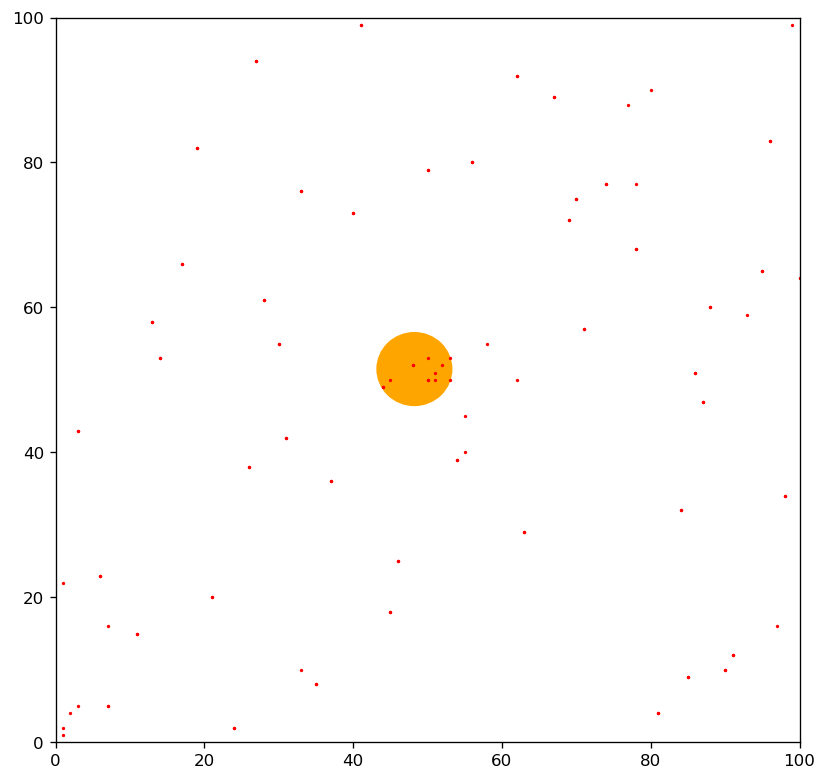

In [176]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8), dpi=120)
plt.axis([0, 100, 0, 100])
plt.plot(xx, yy, 'o', color='red', markersize= 1)
c=plt.Circle (target, radius = r, color = 'orange')
plt.gca ().add_artist (c)
plt.show()